In [3]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from mlxtend.frequent_patterns import association_rules, apriori # for mining frequent itemsets and association rule

import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("bread basket.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [7]:
print('The total number of unique transactions is ', df['Transaction'].nunique())

The total number of unique transactions is  9465


In [9]:
print('The total number of unique items is ', df['Item'].nunique())

The total number of unique items is  94


In [11]:
df['date_time'] = pd.to_datetime(df['date_time'])

In [13]:
df['date'] = df['date_time'].dt.date

In [15]:
df['hour'] = df['date_time'].dt.hour

In [17]:
df['month'] = df['date_time'].dt.strftime('%Y-%m')

In [19]:
df['weekday'] = df['date_time'].dt.strftime('%A')

In [21]:
df.drop('date_time', axis = 1, inplace = True)

In [23]:
df['Item'] = df['Item'].str.strip()
df['Item'] = df['Item'].str.lower()

df.head()

,Transaction,Item,period_day,weekday_weekend,date,hour,month,weekday
0,1,bread,morning,weekend,2016-10-30,9,2016-10,Sunday
1,2,scandinavian,morning,weekend,2016-10-30,10,2016-10,Sunday
2,2,scandinavian,morning,weekend,2016-10-30,10,2016-10,Sunday
3,3,hot chocolate,morning,weekend,2016-10-30,10,2016-10,Sunday
4,3,jam,morning,weekend,2016-10-30,10,2016-10,Sunday


In [25]:
top_items = pd.DataFrame(df['Item'].value_counts(dropna=True, sort=True)).reset_index()
top_items.columns = ['item', 'count']
top_items['percentage'] = top_items['count'].apply(lambda x: x/top_items['count'].sum())
top_items = top_items.head(20)
top_items.head()

,item,count,percentage
0,coffee,5471,0.266787
1,bread,3325,0.162140
2,tea,1435,0.069976
3,cake,1025,0.049983
4,pastry,856,0.041742


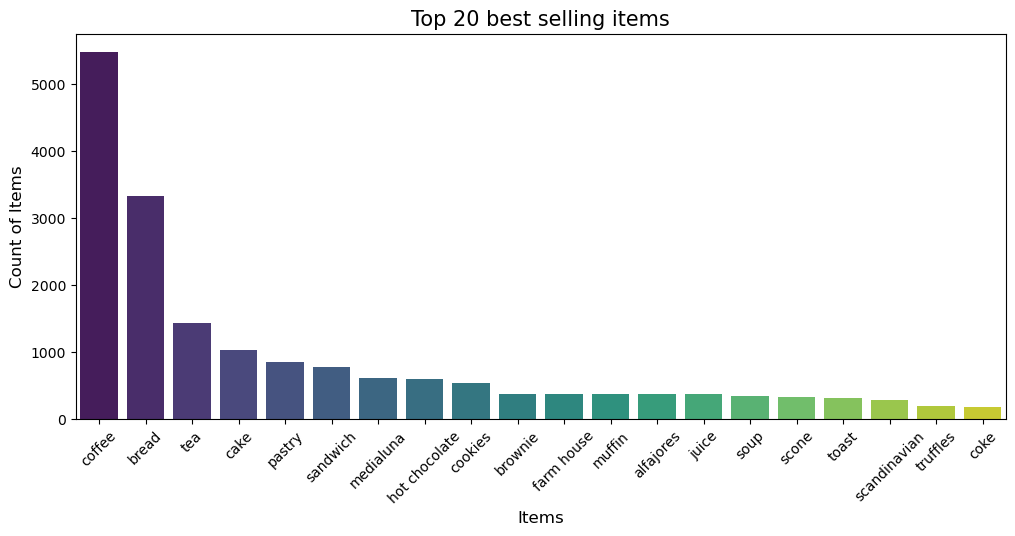

In [27]:
plt.figure(figsize=(12,5))
sns.barplot(x = 'item', y = 'count', data = top_items, palette = 'viridis')
plt.xlabel('Items', size = 12)
plt.xticks(rotation=45)
plt.ylabel('Count of Items', size = 12)
plt.title('Top 20 best selling items', size = 15)
plt.show()

In [29]:
items_num = df.groupby('Transaction', as_index=False)['Item'].count()

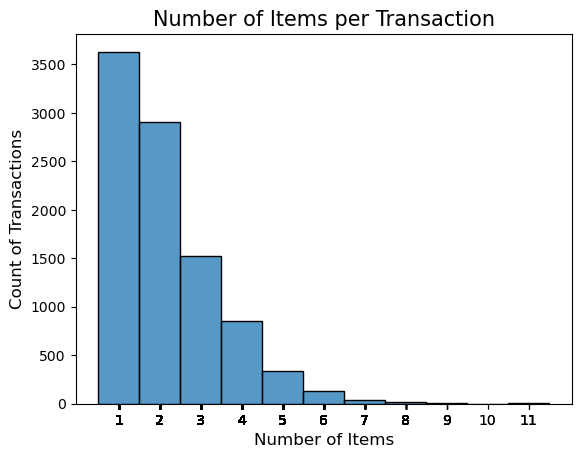

In [31]:
ax = sns.histplot(data= items_num, x='Item', discrete=True)
plt.xlabel('Number of Items', size = 12)
ax.set(xticks=items_num['Item'].values)
plt.ylabel('Count of Transactions', size = 12)
plt.title('Number of Items per Transaction', size = 15)
plt.show()

In [33]:
qty_month = df.groupby('month', as_index=False)['Transaction'].count()
qty_month.head()

,month,Transaction
0,2016-10,369
1,2016-11,4436
2,2016-12,3339
3,2017-01,3356
4,2017-02,3906


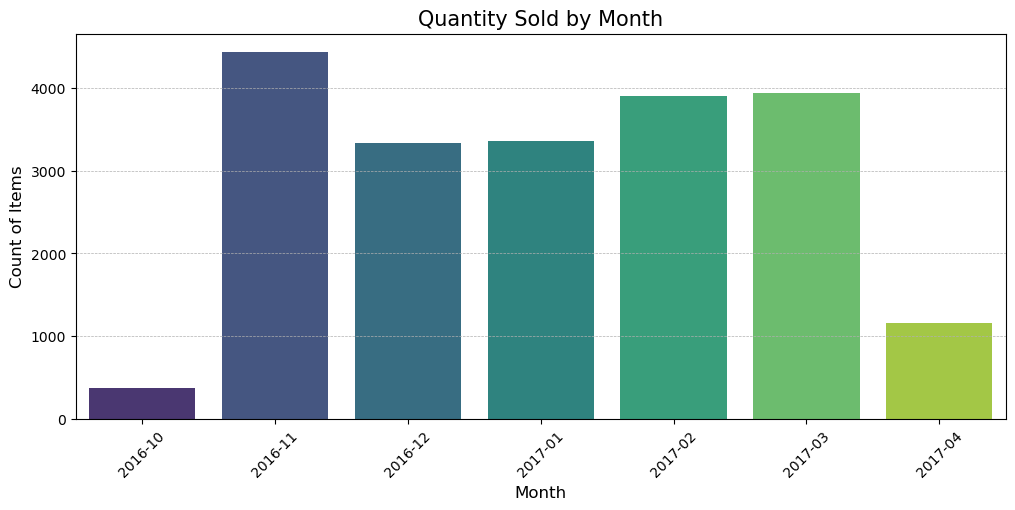

In [35]:
plt.figure(figsize=(12,5))
sns.barplot(x = 'month', y = 'Transaction', data = qty_month, palette = 'viridis')
plt.xlabel('Month', size = 12)
plt.xticks(rotation=45)
plt.ylabel('Count of Items', size = 12)
plt.title('Quantity Sold by Month', size = 15)
plt.grid(axis = 'y', ls='--', lw='0.5')
plt.show()

In [37]:
qty_wd = df.groupby('weekday', as_index=False)['Transaction'].count()
qty_wd['wdkey'] = [4,0,5,6,3,1,2]
qty_wd.sort_values("wdkey",inplace=True)
qty_wd

,weekday,Transaction,wdkey
1,Monday,2324,0
5,Tuesday,2392,1
6,Wednesday,2321,2
4,Thursday,2646,3
0,Friday,3124,4
2,Saturday,4605,5
3,Sunday,3095,6


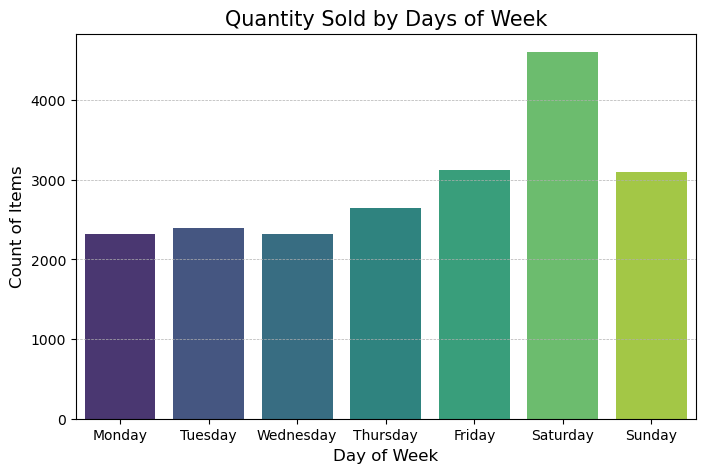

In [39]:
plt.figure(figsize=(8,5))
sns.barplot(x = 'weekday', y = 'Transaction', data = qty_wd, palette = 'viridis')
plt.xlabel('Day of Week', size = 12)
plt.ylabel('Count of Items', size = 12)
plt.title('Quantity Sold by Days of Week', size = 15)
plt.grid(axis = 'y', ls='--', lw='0.5')
plt.show()

In [41]:
qty_hr = df.groupby('hour', as_index=False)['Transaction'].count()
qty_hr['hour_bins'] = pd.cut(x=qty_hr.hour, bins = range(0,24,1))
qty_hr.head()

,hour,Transaction,hour_bins
0,1,1,"(0, 1]"
1,7,24,"(6, 7]"
2,8,645,"(7, 8]"
3,9,1966,"(8, 9]"
4,10,2666,"(9, 10]"


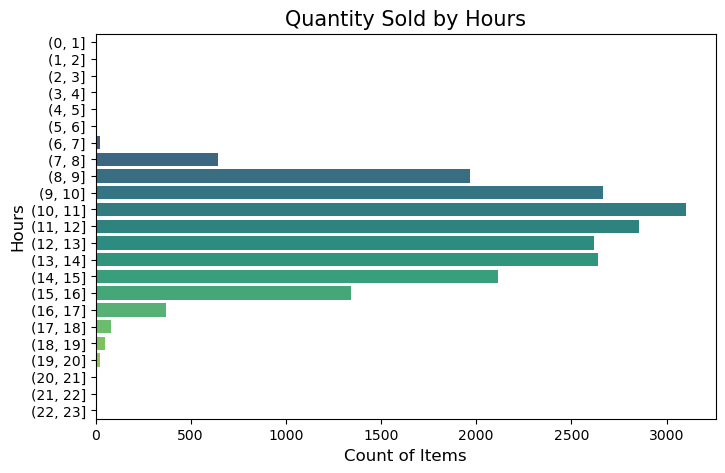

In [43]:
plt.figure(figsize=(8,5))
sns.barplot(x = 'Transaction', y = 'hour_bins', data = qty_hr, palette = 'viridis')
plt.xlabel('Count of Items', size = 12)
plt.ylabel('Hours', size = 12)
plt.title('Quantity Sold by Hours', size = 15)
plt.show()

In [45]:
transactions = df.groupby(['Transaction', 'Item'])['Item'].count().reset_index(name ='Count')
transactions.head()

,Transaction,Item,Count
0,1,bread,1
1,2,scandinavian,2
2,3,cookies,1
3,3,hot chocolate,1
4,3,jam,1


In [47]:
my_basket = transactions.pivot_table(index='Transaction', columns='Item', values='Count', aggfunc='any').fillna(0)

In [49]:
my_basket.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
frequent_items = apriori(my_basket, min_support = 0.01, use_colnames = True)
frequent_items

,support,itemsets
0,0.036344,(alfajores)
1,0.016059,(baguette)
2,0.327205,(bread)
3,0.040042,(brownie)
4,0.103856,(cake)
...,...,...
56,0.023666,"(coffee, toast)"
57,0.014369,"(sandwich, tea)"
58,0.010037,"(coffee, bread, cake)"
59,0.011199,"(coffee, pastry, bread)"


In [53]:
rules = association_rules(frequent_items, metric = "lift", min_threshold = 1.2)
rules.sort_values('confidence', ascending = False, inplace = True)
rules.reset_index(drop=True, inplace = True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(toast),(coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006
1,(spanish brunch),(coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235,0.204851
2,(cake),(tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865,0.420538
3,"(coffee, tea)",(cake),0.049868,0.103856,0.010037,0.201271,1.937977,0.004858,1.121962,0.509401
4,(sandwich),(tea),0.071844,0.142631,0.014369,0.200000,1.402222,0.004122,1.071712,0.309050
5,(hot chocolate),(cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125,0.498236
6,"(coffee, cake)",(tea),0.054728,0.142631,0.010037,0.183398,1.285822,0.002231,1.049923,0.235157
7,(tea),(cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372,0.439556
8,(pastry),"(coffee, bread)",0.086107,0.090016,0.011199,0.130061,1.444872,0.003448,1.046033,0.336907
9,"(coffee, bread)",(pastry),0.090016,0.086107,0.011199,0.124413,1.444872,0.003448,1.043749,0.338354


In [55]:
def rules_to_coordinates(rules):
    rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: list(antecedent)[0])
    rules['consequent'] = rules['consequents'].apply(lambda consequent: list(consequent)[0])
    rules['rule'] = rules.index
    return rules[['antecedent','consequent','rule']]

In [57]:
from pandas.plotting import parallel_coordinates

In [59]:
coords = rules_to_coordinates(rules)

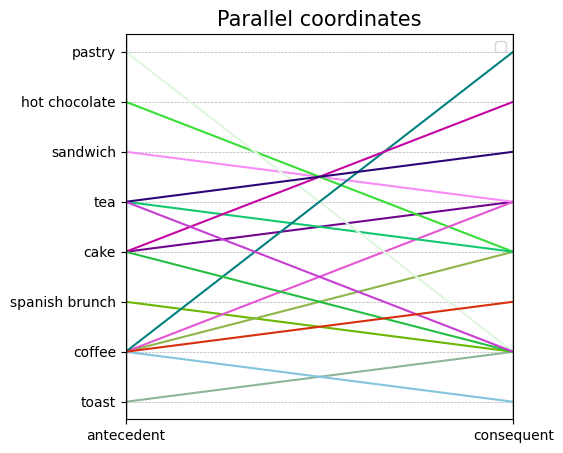

In [61]:
plt.figure(figsize=(5,5))
parallel_coordinates(coords, 'rule')
plt.legend([])
plt.grid(ls='--', lw='0.5')
plt.title('Parallel coordinates', size = 15)
plt.show()

In [63]:
rules['antecedents'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

In [65]:
support_table_lift = rules.pivot(index='consequents', columns='antecedents', values='lift')

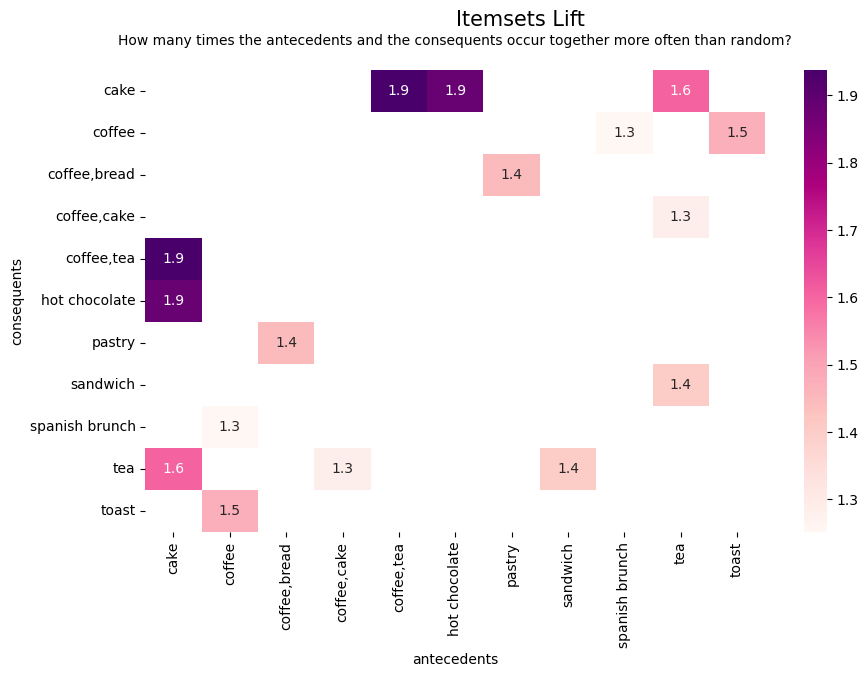

In [67]:
plt.figure(figsize=(10,6))
sns.heatmap(support_table_lift, annot = True, cbar = True, cmap="RdPu")
plt.suptitle('Itemsets Lift', size = 15)
plt.title('How many times the antecedents and the consequents occur together more often than random?\n', size=10)
plt.show()

In [69]:
rules_confidence = rules[rules['confidence']>=0.2] # select min lift=1.2
support_table_conf = rules_confidence.pivot(index='consequents', columns='antecedents', values='confidence')

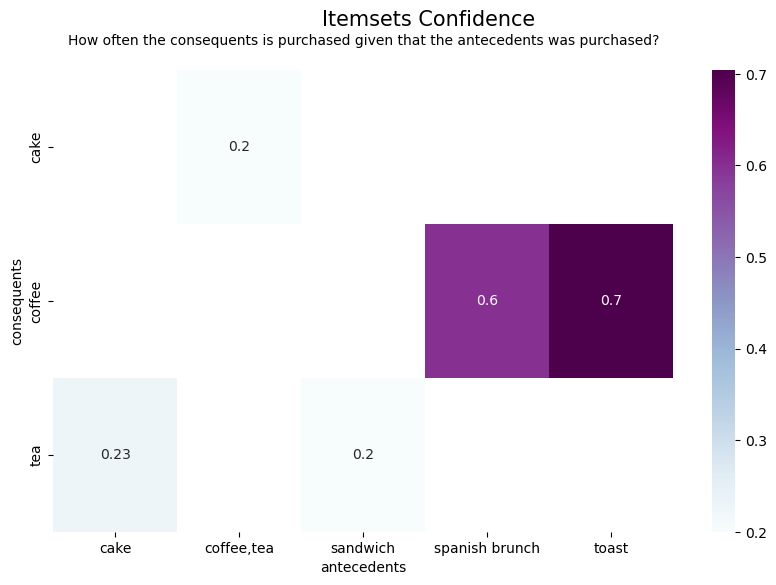

In [71]:
plt.figure(figsize=(10,6))
sns.heatmap(support_table_conf, annot = True, cbar = True, cmap="BuPu")
plt.suptitle('Itemsets Confidence', size = 15)
plt.title('How often the consequents is purchased given that the antecedents was purchased?\n', size = 10)
plt.show()